<a href="https://colab.research.google.com/github/ritika-33/image-classification/blob/main/predictivemaintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [3]:
! kaggle datasets download parvmodi/automotive-vehicles-engine-health-dataset


Dataset URL: https://www.kaggle.com/datasets/parvmodi/automotive-vehicles-engine-health-dataset
License(s): CC0-1.0
  0% 0.00/595k [00:00<?, ?B/s]
100% 595k/595k [00:00<00:00, 111MB/s]


In [4]:
! unzip automotive-vehicles-engine-health-dataset.zip


Archive:  automotive-vehicles-engine-health-dataset.zip
  inflating: engine_data.csv         


In [5]:
import pandas as pd
df= pd.read_csv('engine_data.csv')
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [6]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
df.isna().sum() #isna is used to check null value in dataset

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


In [ ]:
df['Engine Condition'].value_counts()  #is used to check how many value class contaion, here class 1 is  healthy and classs 0 for unhealthy engine

,count
Engine Condition,
1,12317
0,7218


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [24]:


def train_test_split_and_features(df):
  y=df['Engine Condition']
  x=df.drop(['Engine Condition'],axis=1)
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
  print(x.head(5))
  return x_train,x_test,y_train,y_test

In [25]:
x_train, x_test, y_train, y_test= train_test_split_and_features(df)


   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  
0     84.144163     81.632187  
1     77.640934     82.445724  
2     77.752266     79.645777  
3     74.129907     71.774629  
4     78.396989     87.000225  


In [30]:
#fit and evaluate model
def fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=5, min_samples_split=0.01, max_features=0.8, max_samples=0.8):
  random_forest = RandomForestClassifier(random_state=0,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         max_samples=max_samples)
  model = random_forest.fit(x_train, y_train)
  random_forest_predict =random_forest.predict(x_test)
  random_forest_conf_matrix=confusion_matrix(y_test, random_forest_predict)
  random_forest_acc_score=accuracy_score(y_test, random_forest_predict)
  print("Confusion Matrix")
  print(random_forest_conf_matrix)
  print("\n")
  print("Accuracy of Random Forest:", random_forest_acc_score*100,'\n')
  print(classification_report(y_test, random_forest_predict))
  return model

In [32]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

Confusion Matrix
[[ 507  904]
 [ 359 2137]]


Accuracy of Random Forest: 67.67340670591247 

              precision    recall  f1-score   support

           0       0.59      0.36      0.45      1411
           1       0.70      0.86      0.77      2496

    accuracy                           0.68      3907
   macro avg       0.64      0.61      0.61      3907
weighted avg       0.66      0.68      0.65      3907



In [34]:
features = x_train.columns
importances = pd.DataFrame(model.feature_importances_)
importances['features'] =features
importances.columns = ['importance', 'feature']
importances.sort_values(by= 'importance', ascending= True, inplace=True)

In [35]:
importances.head(10)

,importance,feature
5,0.017678,Coolant temp
3,0.024955,Coolant pressure
1,0.060382,Lub oil pressure
4,0.097345,lub oil temp
2,0.163428,Fuel pressure
0,0.636212,Engine rpm


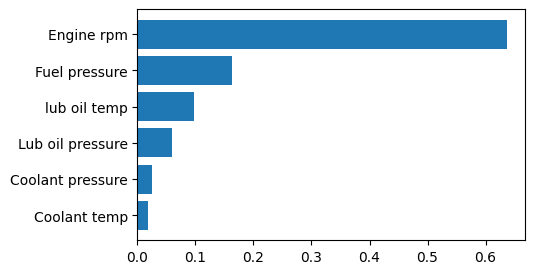

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.barh(importances.feature, importances.importance)
plt.show()

